# - 2차 시험(확률 ~ 회귀분석까지) : 5/29(금) 17:00

# <font color = "skyblue"> Day 6 ~ Day 17

In [4]:
math_schedule = pd.read_csv('resources/Math_schedule.csv',index_col=0)
math_schedule[5:18]

,수학/통계/머신러닝 강의주제,강의명_온라인
Day,,
6,"최적화기초_선형계획법_집합, 확률의수학적정의_확률의성질_확률분포함수","최적화기초_선형계획법_집합_20191028_03 ~ 04, 확률의수학적정의_확률의성..."
7,결합확률_조건부확률_베이즈정리,결합확률_조건부확률_베이즈정리_20191029_01 ~ 04
8,확률적 데이터와 확률변수_기대값과 확률변수의 변환_다변수 확률변수,확률적 데이터와 확률변수_기대값과 확률변수의 변환_다변수 확률변수_20191104_...
9,독립과상관_공분산과상관계수_베루누이분포와이항분포,독립과상관_공분산과상관계수_베루누이분포와이항분포_20191105_01 ~ 04
10,다항분포_정규분포_다변수정규분포,다항분포_정규분포_다변수정규분포_20191109_01 ~ 04
11,베타분포_확률분포의 추정_최대가능도 추정법,베타분포_확률분포의 추정_최대가능도 추정법_20191111_01 ~ 04
12,검정과 유의확률_사이파이를 사용한 검정_엔트로피,검정과 유의확률_사이파이를 사용한 검정_엔트로피_20191112_01 ~ 04
13,"엔트로피_상호정보량, 데이터 분석_머신러닝용 파이썬 패키지","엔트로피_상호정보량_20191116_01 ~ 03, 데이터 분석_머신러닝용 파이썬 ..."
14,데이터 전처리 기초_범주형 데이터 처리_선형회귀분석의 기초,데이터 전처리 기초_범주형 데이터 처리_선형회귀분석의 기초_20191118_01 ~ 04


## 6. Pgmpy, Probability

## 표본, 표본공간, 사건의 정의
- 빈도주의,베이지안 관점
- 사건: 일어날수 있는 목록 : 이것들 중에 발생한다는 주장
## 콜로고로프 
## 포함배제원리
## * 전체확률의 법칙 

In [98]:
### 원반에 화살이 꽂는 문제 0~180에 2배의 확률을 주었을때를 코딩
def scam_discus_arrow (a, b):
    # 구간별 화살이 꽂힐 확률 할당
    
    H_range = 0.666666 # 조작으로 확률이 높은구간 
    L_range = 0.333333 # 확률이 낮은구간
    pi_2 = 180
    
    # 구간 설정
    H_r_angle = range(0, 181)
    L_r_angle = range(180, 361)
#     L_r_angle > 180
#     L_r_angle <= np.pi
    
    
    if a and b in H_r_angle:
        
        return (b - a)/pi_2 * H_range

    
     
    if a in H_r_angle and b in L_r_angle:
        return (b -180)/pi_2 * L_range + (180 - a)/pi_2 * H_range
    
    
    if a and b in L_r_angle:
        return (b - a)/pi_2 * L_range
    
    

In [99]:
scam_discus_arrow(90, 270)

0.4999995

### cdf F(b)-F(a) = P(a,b) > 2차원 변수 2개를 1개로 만들기위한 ∞를 이용한 1차원함수로 줄여보자!

#### cdf 는 단순표본이 들어가는 p(a) 로 표기

In [120]:
### cdf
def  F(a):
    if a < 0 :
        return 0
    if a > 360 :
        return 1
    
    elif a < 180 :
        return (2/3) * (a/ 180)
    elif a >= 180:
        return (2/3) + (1/3) * ((a-180)/ 180)
    
    

In [121]:
# float('inf') and float('-inf').
float('-inf')

-inf

In [122]:
F(180)

0.6666666666666666

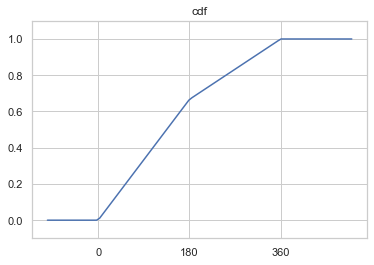

In [124]:
xx = np.linspace(-100, 500, 100)
Fs = np.array(list(map(F, xx))) # xx 를 F에 넣어서 다시 리스트로 만들어 처리

plt.plot(xx, Fs)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("cdf")
plt.show()
%matplotlib inline

## cdf 의 도함수 pdf > pdf는 구간의 면적이 확률임
#### 그러므로 총면적은 1

In [126]:
### 표본의 수가 무한할때는 구간으로 정리

## 7. Random variable, Covariance, Correlation coefficient

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype = "category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
petal_l = df[df.species == "setosa"]['petal length (cm)'].values # value extract
petal_l

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

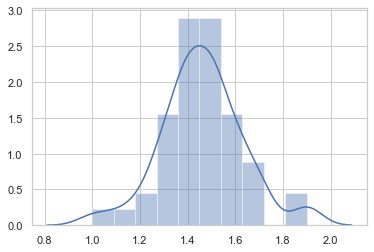

In [28]:

sns.distplot(petal_l)
plt.show()
%matplotlib inline

In [29]:
petal_l = df['petal length (cm)'].values # value extract
petal_l

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

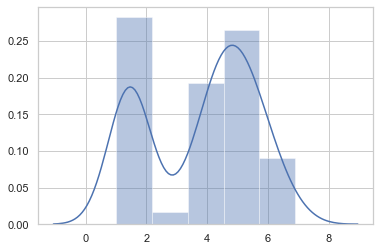

In [30]:
sns.distplot(petal_l)
plt.show()
%matplotlib inline

In [37]:
xx = np.linspace(-100, 500, 1000)
p = np.zeros_like(xx)
p[(0 < xx) & (xx <= 360)] = 1 /360
xxp= xx * p
plt.show()

Font 'default' does not have a glyph for '\ub3c4' [U+b3c4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub3c4' [U+b3c4], substituting with a dummy symbol.


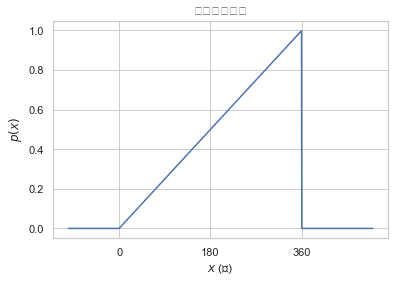

In [36]:

plt.plot(xx, xxp)

plt.xticks([0, 180, 360])
plt.title("확률밀도함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$p(x)$")
plt.show()

Font 'default' does not have a glyph for '\ub3c4' [U+b3c4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub3c4' [U+b3c4], substituting with a dummy symbol.


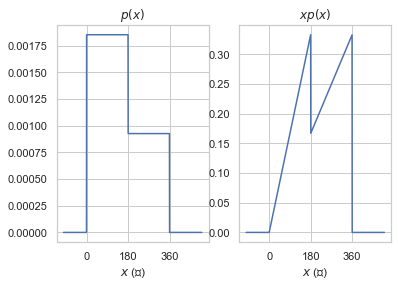

In [38]:
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 180)] = 2 / (3 * 360)
p[(180 < x) & (x <= 360)] = 1 / (3 * 360)
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")\

plt.show()

## 8. Scipy, Distribution

## 9. Estimation, Testing

## 10. Entropy

## 11. Pre-processing, Scaling

## 12. OLS, MLE Regression

In [64]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]